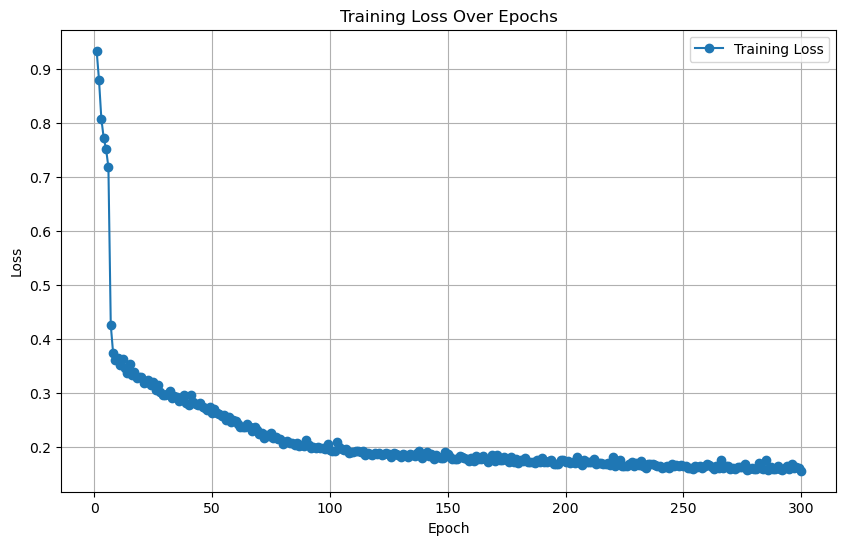

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the provided CSV file to inspect its structure
file_path = 'results/DS1/epoch_loss.csv'
epoch_loss_data = pd.read_csv(file_path)
# Extract the data
epochs = epoch_loss_data['Epoch']
loss = epoch_loss_data['Loss']

# Plot the training loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, marker='o', linestyle='-', label='Training Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

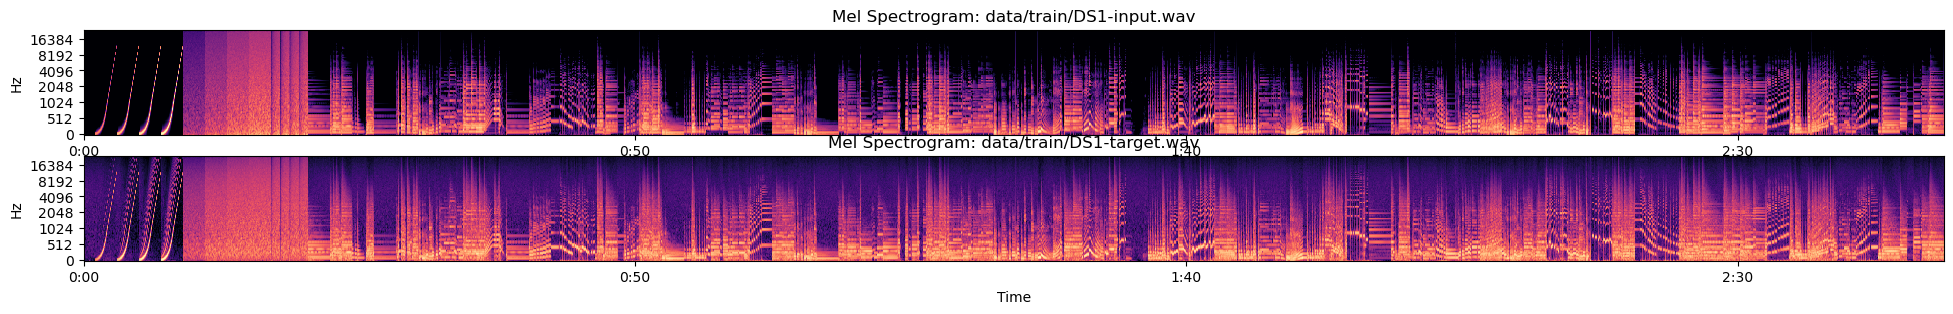

In [6]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Paths to the WAV files
wav_files = [
    'data/train/DS1-input.wav',
    'data/train/DS1-target.wav'
]

# Sampling rate
sr = 48000

# Function to plot log-scale mel spectrogram
def plot_log_melspectrogram(file_path, sr, ax):
    y, _ = librosa.load(file_path, sr=sr, duration=210)
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=sr//2)
    S_dB = librosa.power_to_db(S, ref=np.max)
    img = librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel',
                                   fmax=sr//2, ax=ax, cmap='magma')
    ax.set_title(f'Mel Spectrogram: {file_path}')
    return img

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(24, 3))

# Plot each file
for i, file_path in enumerate(wav_files):
    img = plot_log_melspectrogram(file_path, sr, axs[i])

# Add colorbar
#plt.colorbar(img, ax=axs, format="%.2f")
# plt.tight_layout()
plt.show()
